In [1]:
import sys
import librosa
import numpy as np
from IPython.display import Audio
from IPython.core.display import display, HTML

import torchaudio
import torch
import matplotlib.pyplot as plt
import torchaudio.transforms as T

/tmp/ipykernel_2419731/4177442219.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [2]:
path='/home/sxk230060/TI2AV/misc/ltx_lora_training_i2v_t2v/more_scripts/'
sys.path.append(path)
from analyse_vae_audio_auffusion import VAEAudioAnalyse

/home/sxk230060/miniconda3/envs/ltx/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
vae_obj = VAEAudioAnalyse()
audio_path = '/home/sxk230060/TI2AV/misc/ltx_lora_training_i2v_t2v/outputs/temp/ambulance.wav'
latent = vae_obj.audio_to_latent(audio_path)
save_path = '/home/sxk230060/TI2AV/misc/ltx_lora_training_i2v_t2v/outputs/temp/ambulance_reconstructed.wav'
vae_obj.latent_to_audio(latent, save_path)

Fetching 17 files: 100%|██████████| 17/17 [00:00<00:00, 33792.97it/s]


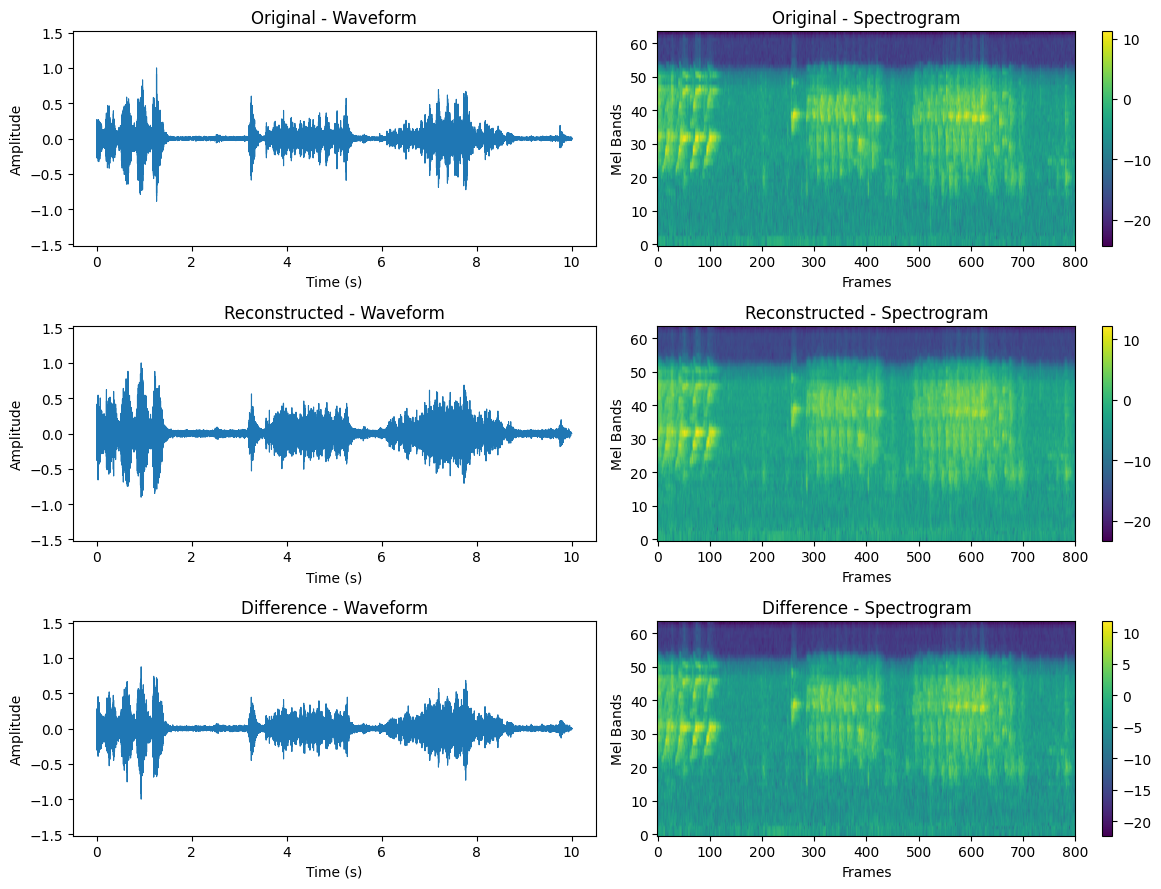

In [12]:
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt

def plot_waveform_and_spectrogram(waveform, sr, title, ax1, ax2, amp_lim):

    waveform = waveform / torch.max(torch.abs(waveform))

    time_axis = torch.arange(waveform.shape[1]) / sr
    ax1.plot(time_axis.numpy(), waveform.numpy().squeeze(), linewidth=0.8)
    ax1.set_title(f"{title} - Waveform")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Amplitude")
    ax1.set_ylim(-amp_lim, amp_lim)  # Keep amplitude limits consistent

    # Compute spectrogram
    transform = T.MelSpectrogram(sample_rate=sr, n_mels=64)
    mel_spec = transform(waveform)
    
    im = ax2.imshow(mel_spec.log2().numpy().squeeze(), aspect='auto', origin='lower')
    ax2.set_title(f"{title} - Spectrogram")
    ax2.set_xlabel("Frames")
    ax2.set_ylabel("Mel Bands")
    plt.colorbar(im, ax=ax2)

# Load original and reconstructed waveforms
# audio_path = "path_to_original.wav"
# save_path = "path_to_reconstructed.wav"

waveform_orig, sr_orig = torchaudio.load(audio_path)
waveform_recon, sr_recon = torchaudio.load(save_path)

assert sr_orig == sr_recon, "Sampling rates must match!"

waveform_orig = waveform_orig / torch.max(torch.abs(waveform_orig))
waveform_recon = waveform_recon / torch.max(torch.abs(waveform_recon))

min_len = min(waveform_orig.shape[1], waveform_recon.shape[1])
waveform_orig = waveform_orig[:, :min_len]
waveform_recon = waveform_recon[:, :min_len]

waveform_diff = waveform_orig - waveform_recon

amp_lim = max(torch.max(torch.abs(waveform_orig)), torch.max(torch.abs(waveform_recon)), torch.max(torch.abs(waveform_diff)))

# Plot waveforms and spectrograms
fig, axes = plt.subplots(3, 2, figsize=(12, 9))  # 3 rows for original, reconstructed, and difference

plot_waveform_and_spectrogram(waveform_orig, sr_orig, "Original", axes[0, 0], axes[0, 1], amp_lim)
plot_waveform_and_spectrogram(waveform_recon, sr_recon, "Reconstructed", axes[1, 0], axes[1, 1], amp_lim)
plot_waveform_and_spectrogram(waveform_diff, sr_orig, "Difference", axes[2, 0], axes[2, 1], amp_lim)

plt.tight_layout()
plt.show()


In [13]:
Audio(save_path)

In [14]:
Audio(audio_path)